### Importing packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### Reading and Preparing the dataset

In [3]:
# Reading and Preparing the dataset
data = pd.read_csv('../data/train.csv')
data = data.drop(['S.No'], axis=1)
data = data.drop(['time'], axis=1)
data = data.values

np.random.seed(2)
inds = np.arange(data.shape[0])
np.random.shuffle(inds)
num_train = int(0.95 * data.shape[0])
train_inds = inds[:num_train]
val_inds = inds[num_train:]

trainset = data[train_inds] 
valset = data[val_inds]

# Normalize train set to mean 0 and standard deviation 1 feature-wise.
mu = trainset[:, :-1].mean(axis=0)
sigma = trainset[:, :-1].std(axis=0)
trainset[:, :-1] = (trainset[:, :-1] - mu)/sigma
valset[:, :-1] = (valset[:, :-1] - mu)/sigma

train_X = trainset[:, :-1]
train_y = trainset[:, -1]

val_X = valset[:, :-1]
val_y = valset[:, -1]

# Random Forest with Grid Searching

In [4]:
max_depth = [10, 20, 30, 40]
min_samples_leaf = [2, 5, 6, 10, 20, 30, 40]

param_grid = {
    "n_estimators": [100],
    "max_depth": max_depth,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": [True, False]
}

clf = GridSearchCV(RandomForestClassifier(), param_grid).fit(train_X, train_y)

y_pred = clf.predict(val_X)
print('accuracy', clf.score(val_X, val_y))
print('balanced_accuracy_score', balanced_accuracy_score(y_pred, val_y))
print('confusion_matrix\n', confusion_matrix(val_y, y_pred))

accuracy 0.8881909547738693
balanced_accuracy_score 0.8302123389594106
confusion_matrix
 [[7183   48  318]
 [ 142  248    0]
 [ 550   10 1053]]


In [5]:
print('best_params:\n', clf.best_params_)

best_params:
 {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 20, 'n_estimators': 100}


<AxesSubplot:>

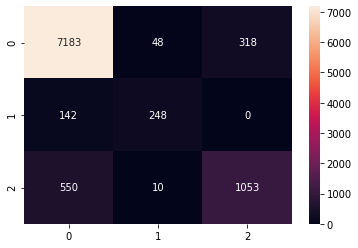

In [6]:
conf_matrix = confusion_matrix(val_y, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")

# Making predictions and saving the results in CSV file

In [7]:
def get_data_mean_sigma():
    data = pd.read_csv('../data/train.csv')
    data = data.drop(['S.No'], axis=1)
    data = data.drop(['time'], axis=1)
    data = data.values

    X = data[:, :-1]
    y = data[:, -1]

    mu = X.mean(axis=0)
    sigma = X.std(axis=0)

    return mu, sigma

test_data = pd.read_csv('../data/test.csv')
test_data = test_data.drop(['S.No'], axis=1)
test_data = test_data.drop(['time'], axis=1)
test_data = test_data.values
mu, sigma = get_data_mean_sigma()
test_data = (test_data - mu)/sigma


clf_predicts = clf.predict(test_data)
df = pd.DataFrame(clf_predicts.astype(int), columns = ['LABELS'])
df.insert(0, 'S.No', np.array([i for i in range(len(test_data))]))
df.to_csv('../predictions/random_forest.csv', index=False)